# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

## Import Resources

#### run below cell and restart Kernel before proceeding:
You will need to run the install everytime provided your session is disconnected or kernel is restarted. Reason being session information is lost when you revisit the workspace after its disconnected or kernel is restarted.
(https://knowledge.udacity.com/questions/598506)

In [1]:
# old version of the dataset needs the following:
#%pip --no-cache-dir install tensorflow-datasets --user
#=========================================================================
#The new version of dataset is only available in the tfds-nightly package. 
%pip --no-cache-dir install tfds-nightly --user 
!pip install tensorflow --upgrade --user

# DON'T MISS TO RESTART THE KERNEL; do not run again after restarting the Kernel

     |████████████████████████████████| 3.9MB 5.0MB/s eta 0:00:01
     |████████████████████████████████| 1.0MB 30.5MB/s eta 0:00:01     |█████████████▌                  | 430kB 30.5MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 454.3MB 21kB/s s eta 0:00:01     |███████████████████▍            | 274.7MB 31.9MB/s eta 0:00:06     |███████████████████▋            | 279.0MB 31.9MB/s eta 0:00:06     |███████████████████▊            | 280.0MB 31.9MB/s eta 0:00:06     |███████████████████▉            | 282.3MB 29.6MB/s eta 0:00:06     |████████████████████▌           | 290.5MB 29.6MB/s eta 0:00:06     |█████████████████████           | 297.4MB 29.6MB/s eta 0:00:06     |█████████████████████▏          | 300.2MB 29.6MB/s eta 0:00:06     |█████████████████████▎          | 301.4MB 29.6MB/s eta 0:00:06     |█

#### Do not run the following 2 cells if model is already trained.

# loop to keep workspace awake: insert all code within
from workspace_utils import keep_awake

for i in keep_awake(range(5)):  #anything that happens inside this loop will keep the workspace active
    # do iteration with lots of work here

# Using active session:
from workspace_utils import active_session

with active_session():
    # do long-running work here

#### ------------------------------------------------------------------------------------------------------------------------------------------------

In [2]:
# Import TensorFlow 
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import tensorflow_hub as hub

In [3]:
# TODO: Make all other necessary imports.
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# in case we need to define functions and make plots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [7]:
# Download data to default local directory "~/tensorflow_datasets"
!python -m tensorflow_datasets.scripts.download_and_prepare --register_checksums=True --datasets=oxford_flowers102

# define the splits
#splits = ('train[:60%]+test[:60%]', 'train[60%:80%]+test[60%:80%]', 'train[80%:100%]+test[80%:100%]')
#splits = ('train[:60%]','test[:20%]','test[:20%]')
splits = ('train', 'test', 'validation')
# TODO: Load the dataset with TensorFlow Datasets. Hint: use tfds.load()
dataset, dataset_info = tfds.load('oxford_flowers102', as_supervised = True, with_info = True, shuffle_files=True);


2021-06-14 10:46:59.026783: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-06-14 10:46:59.026955: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
usage: download_and_prepare.py build [-h] [--helpfull]
                                     [--module_import MODULE_IMPORT]
                                     [--builder_config_id BUILDER_CONFIG_ID]
                                     [--datasets DATASETS_KEYWORD [DATASETS_KEYWORD ...]]
                                     [--overwrite]
                                     [--max_examples_per_split [MAX_EXAMPLES_PER_SPLIT]]
                                     [--data_dir DATA_DIR]
                                     [--download_dir DOWNLOAD_DIR]
                                     [--extract_dir EXT

In [12]:
# TODO: Create a training set, a validation set and a test set.
train_data, test_data, valid_data = dataset['train'], dataset['test'], dataset['validation']

## or simply
# training_set, validation_set, test_set = dataset

In [13]:
train_data

<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

## Explore the Dataset

In [14]:
# TODO: Get the number of examples in each set from the dataset info.
num_training_examples  = dataset_info.splits['train'].num_examples
num_test_examples = dataset_info.splits['test'].num_examples
num_valid_examples = dataset_info.splits['validation'].num_examples

print('There are {:,} images in the training set'.format(num_training_examples))
print('\nThere are {:,} images in the test set'.format(num_test_examples))
print('There are {:,} images in the validation set'.format(num_valid_examples))

There are 1,020 images in the training set

There are 6,149 images in the test set
There are 1,020 images in the validation set



#### TODO: Print the shape and corresponding label of 3 images in the training set.

for image_batch, label_batch in training_set.take(3):
    image = image_batch.numpy().squeeze()
    label = label_batch.numpy()
    print('Shape: {}, label: {}'.format(image_batch.shape, label_batch))

In [15]:
# image shapes
shape_images = dataset_info.features['image'].shape
print('The images in our dataset have shape:', shape_images)

The images in our dataset have shape: (None, None, 3)


In [16]:
#Print the shape and corresponding label of 3 images in the training set.
for image, label in train_data.take(3):
    print('The images in the training set have:')
    print('\u2022 dtype:', image.dtype) 
    print('\u2022 shape:', image.shape)
  
    print('\nThe labels of the images have:')
    print('\u2022 dtype:', label.dtype) 

The images in the training set have:
• dtype: <dtype: 'uint8'>
• shape: (500, 667, 3)

The labels of the images have:
• dtype: <dtype: 'int64'>
The images in the training set have:
• dtype: <dtype: 'uint8'>
• shape: (500, 666, 3)

The labels of the images have:
• dtype: <dtype: 'int64'>
The images in the training set have:
• dtype: <dtype: 'uint8'>
• shape: (670, 500, 3)

The labels of the images have:
• dtype: <dtype: 'int64'>


In [17]:
# TODO: Get the number of classes in the dataset from the dataset info.
num_classes = dataset_info.features['label'].num_classes

print('There are {:,} classes in our dataset'.format(num_classes))

There are 102 classes in our dataset


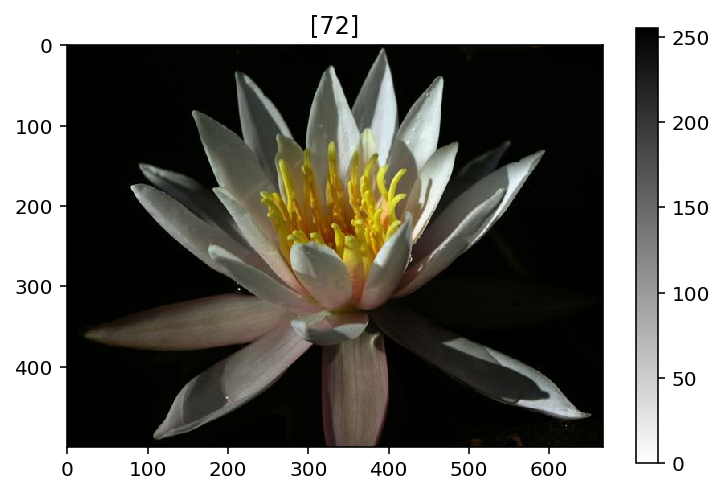

The label of this image is: 72


In [18]:
# TODO: Plot 1 image from the training set. 
# Set the title of the plot to the corresponding image label. 

for image, label in train_data.take(1):
    image = image.numpy().squeeze()
    label = label.numpy()
    
# Plot the image
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.title([label])
plt.show()


print('The label of this image is:', label)


### Label Mapping

You'll also need to load in a mapping from label to category name. You can find this in the file `label_map.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/3.7/library/json.html). This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.

In [19]:
import json

In [20]:
with open('label_map.json', 'r') as f:
    class_names = json.load(f)
    
flower = class_names.get('72')
print(flower)

azalea


In [21]:
for image, label in train_data.take(1):
    image = image.numpy().squeeze()
    label = label.numpy()

print(type(label))

<class 'numpy.int64'>


72 azalea


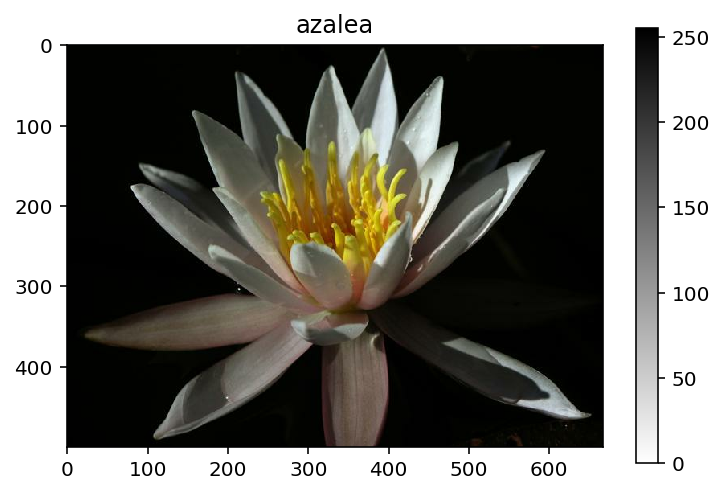

The label of this image is: 72
The class name of this image is: azalea


In [22]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding class name. 
for image, label in train_data.take(1):
    image = image.numpy().squeeze()
    label = label.numpy()
    class_name = str(label)
    class_name = class_names.get(class_name)
    print(label, class_name)

# Plot the image
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.title(class_name)
plt.show()

print('The label of this image is:', label)
print('The class name of this image is:', class_name)

In [35]:
#!pip install keras --user
#from tensorflow.keras.preprocessing.images import ImageDataGenerator

#create a data generator:
#t_dat = tf.convert_to_tensor(train_data)
t_dat = train_data
t_dat = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False, samplewise_center=False,
    featurewise_std_normalization=False, samplewise_std_normalization=False,
    zca_whitening=False, zca_epsilon=1e-06, rotation_range=90, width_shift_range=0.2,
    height_shift_range=0.2, brightness_range=None, shear_range=0.2, zoom_range=0.2,
    channel_shift_range=0.0, fill_mode='nearest', cval=0.0,
    horizontal_flip=True, vertical_flip=True, rescale=None,
    preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None
)

## Create Pipeline

#### another pipeline created: (https://github.com/nicklessman/image-classifier/blob/master/Project_Image_Classifier_Project.ipynb)
##### TODO: Create a pipeline for each set.
image_size = 224
def format_image(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (image_size, image_size))
    image /= 255
    return image, label

batch_size = 64

training_batches = training_set.cache().shuffle(num_training_examples//4).map(format_image).batch(batch_size).prefetch(1)
testing_batches = test_set.cache().map(format_image).batch(batch_size).prefetch(1)
validation_batches = validation_set.shuffle(num_training_examples//4).map(format_image).batch(batch_size).prefetch(1)

In [23]:
# resize image function
image_size = 224 # image shape needed for the pre-trained NN
def resize(image, label):
    image = tf.image.resize(image, [image_size, image_size], preserve_aspect_ratio=False)
    return image, label
#print('\u2022 shape:', image.shape)

In [24]:
# normalize images function
image_size = 224 # image shape needed for the pre-trained NN
def normalize(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255
    #image = tf.image.resize(image, [image_size, image_size], preserve_aspect_ratio=False)
    return image, label

In [25]:
# augmenting data
max_delta = 0.2
rot=90
def augment(image, label):
    image = tf.image.random_flip_left_right(image)
   # image = tf.image.random_flip_up_down(image)
    #image = tf.image.random_brightness(image, max_delta, seed=None)
    #image = tf.image.random_hue(image, max_delta, seed=None)
    image = tf.image.random_contrast(image, 0.4, 1.0, seed=None)
    #image = tf.image.rot90(image)
    return image, label

In [28]:
# TODO: Create a pipeline for each set.
batch_size = 16

## create an image generator:
#image_gen = ImageDataGenerator(rescale=1./255)
#one_image = image_gen.flow_from_directory(directory=train_dir,
                                          #batch_size=BATCH_SIZE,
                                          #shuffle=True,
                                          #target_size=(IMG_SHAPE,IMG_SHAPE),
                                          #class_mode='binary')

training_batches = train_data.cache().shuffle(num_training_examples//4).map(resize).map(normalize).map(augment).batch(batch_size).prefetch(1)
validation_batches = valid_data.cache().map(resize).map(normalize).map(augment).batch(batch_size).prefetch(1)
testing_batches = test_data.cache().map(resize).map(normalize).map(augment).batch(batch_size).prefetch(1)

#.map(augment_data)

In [29]:
for image_batch, label_batch in training_batches.take(1):
    print('The images in each batch have:')
    print('\u2022 dtype:', image_batch.dtype) 
    print('\u2022 shape:', image_batch.shape)
  
    print('\nThere are a total of {} image labels in this batch:'.format(label_batch.numpy().size))
    print(label_batch.numpy())

The images in each batch have:
• dtype: <dtype: 'float32'>
• shape: (16, 224, 224, 3)

There are a total of 16 image labels in this batch:
[71 95 79 72  2 89 50 88 33 99 92 99 89 16 81 55]


augmented_im = [train_data[0][0][0] for i in range(6)]
plotImages(augmented_im)

In [30]:
training_batches

<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>

In [31]:
validation_batches

<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>

In [32]:
testing_batches

<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>

91 hippeastrum


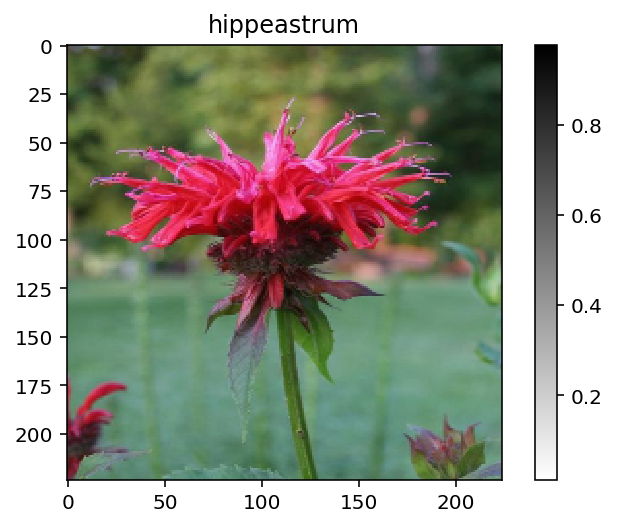

The label of this image is: 91


In [33]:
# Take a single batch of images, and remove the color dimension by squeezing it
for image_batch, label_batch in training_batches.take(1):
    images = image_batch.numpy().squeeze()
    labels = label_batch.numpy()
    class_name = str(labels[0])
    class_name = class_names.get(class_name)
    print(labels[0], class_name)
    
# Plot the image
plt.imshow(images[0], cmap = plt.cm.binary)
plt.colorbar()
plt.title(class_name)
plt.show()

print('The label of this image is:', labels[0])

# Build and Train the Classifier

Now that the data is ready, it's time to build and train the classifier. You should use the MobileNet pre-trained model from TensorFlow Hub to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! 

Refer to the rubric for guidance on successfully completing this section. Things you'll need to do:

* Load the MobileNet pre-trained network from TensorFlow Hub.
* Define a new, untrained feed-forward network as a classifier.
* Train the classifier.
* Plot the loss and accuracy values achieved during training for the training and validation set.
* Save your trained model as a Keras model. 

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right.

**Note for Workspace users:** One important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module. Also, If your model is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with `ls -lh`), you should reduce the size of your hidden layers and train again.

## Use the Mobilinet Model

In [35]:
### Use the Mobilinet model
# recommended by Udacity mentor not to build and train a NN from scratch; refer to https://knowledge.udacity.com/questions/600476)
IMAGE_RES = 224
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2"
feature_extractor = hub.KerasLayer(URL, input_shape=(IMAGE_RES,IMAGE_RES,3))
# freeze params of mobilenet_v2 
feature_extractor.trainable = False
model = tf.keras.models.Sequential([feature_extractor, tf.keras.layers.Dense(102, activation='softmax')])

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

EPOCHS = 10

history = model.fit(training_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 102)               130662    
Total params: 2,388,646
Trainable params: 130,662
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/10
64/64 [==============================] - 82s 1s/step - loss: 4.0107 - accuracy: 0.1696 - val_loss: 2.5259 - val_accuracy: 0.4627
Epoch 2/10
64/64 [==============================] - 70s 1s/step - loss: 1.5102 - accuracy: 0.7539 - val_loss: 1.6302 - val_accuracy: 0.6618
Epoch 3/10
64/64 [==============================] - 78s 1s/step - loss: 0.7817 - accuracy: 0.9186 - val_loss: 1.2490 - val_accuracy: 0.7559
Epoch 4/10
64/64 [==============================] - 71s 1s/step - loss: 0.4631 - a

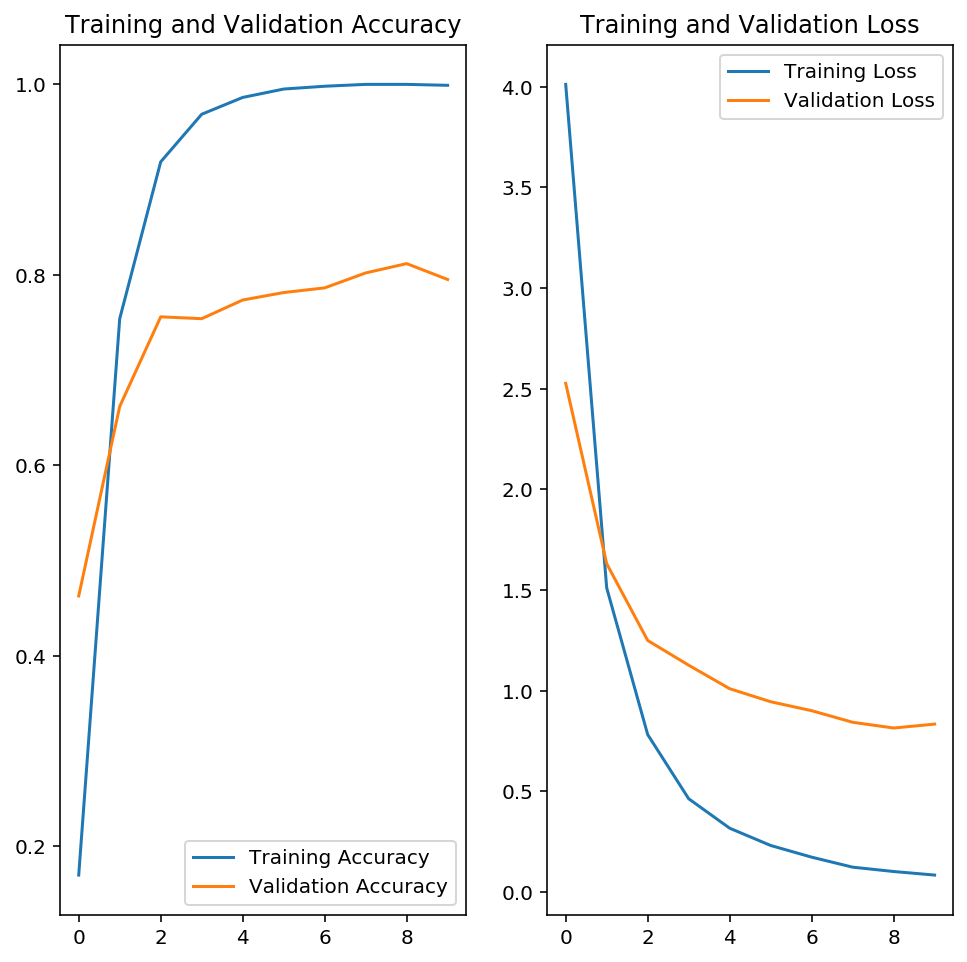

In [36]:
#### TODO: Print the loss and accuracy values achieved on the entire test set.
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [37]:
# Dislay the layers in our model
model.layers

In [38]:
model_weights_biases = model.get_weights()
print(type(model_weights_biases))

<class 'list'>


83 hibiscus
The label of this image is: 83


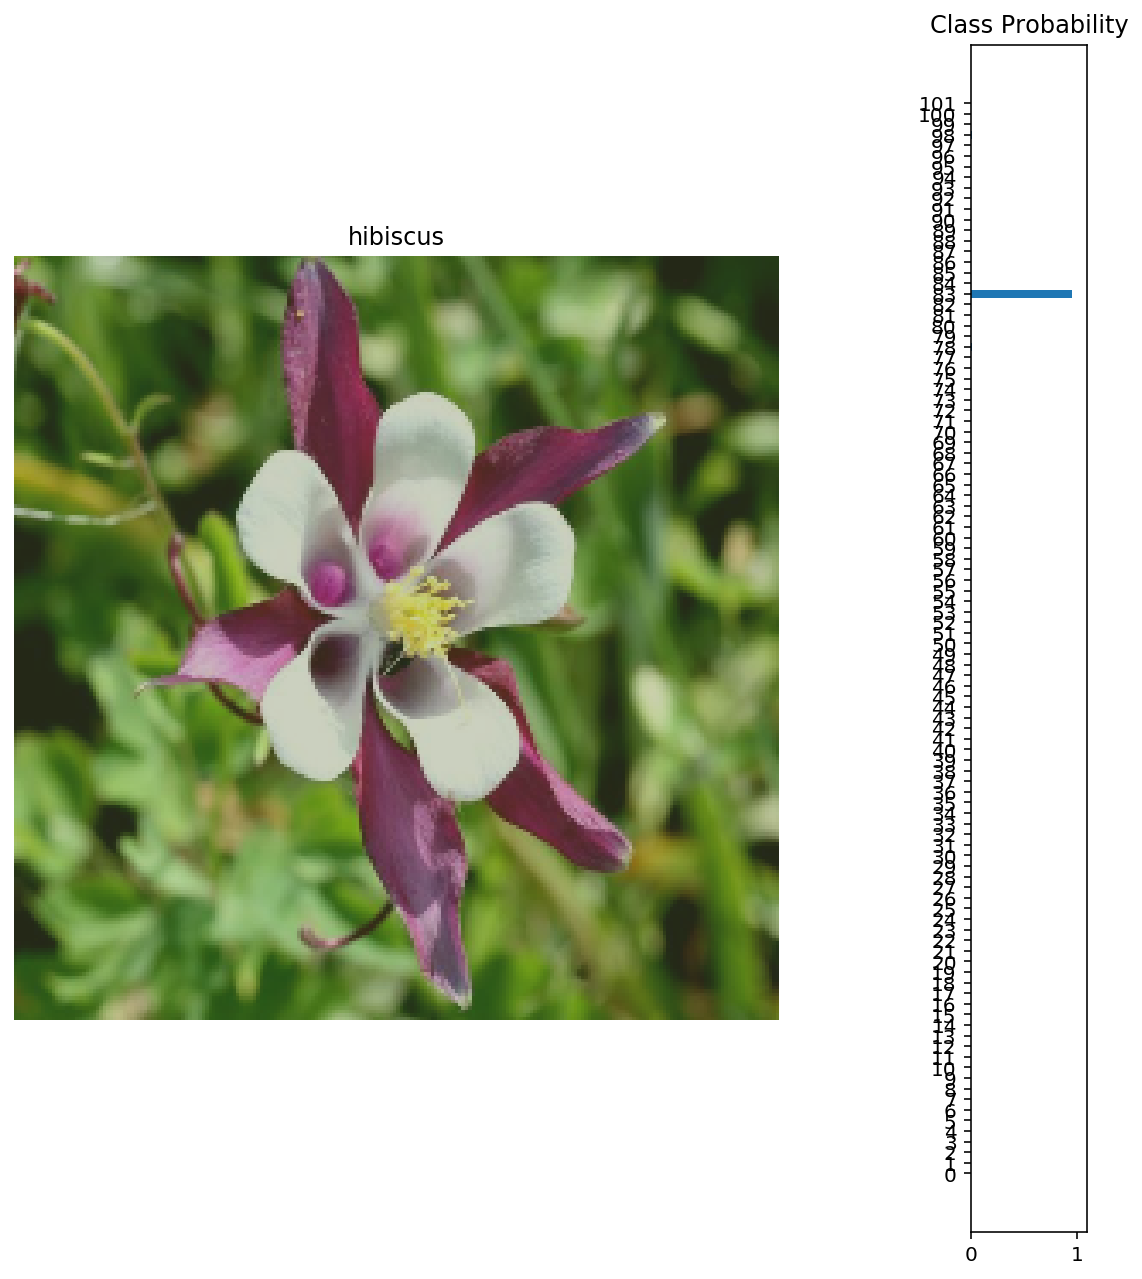

In [41]:
# Making predictions
for image_batch, label_batch in training_batches.take(1):
    ps = model.predict(image_batch)
    first_image = image_batch.numpy().squeeze()[0]
    labels = label_batch.numpy()
    class_name = str(labels[0])
    class_name = class_names.get(class_name)
    print(labels[0], class_name)

fig, (ax1, ax2) = plt.subplots(figsize=(10,9), ncols=2)
ax1.imshow(first_image, cmap = plt.cm.binary)
ax1.axis('off')
ax1.set_title(class_name)
ax2.barh(np.arange(102), ps[0])
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(102))
ax2.set_yticklabels(np.arange(102))
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)
plt.tight_layout()

print('The label of this image is:', labels[0])

## Build a NN

#### The below model was giving bad loss and accurracy and it was recommeded by a Udacity mentor to use Mobilinet instead. 
#### (skip to the next section: "Testing your Network")

In [ ]:
### Building a model from scratch 
#### the below model could not be trained !!!!!

In [45]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

tf.keras.backend.clear_session() # to clear session from old models. 
#no_classes = 102
# TODO: Build and train your network.
flower_model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
        tf.keras.layers.Dense(1024, activation = 'relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(512, activation = 'relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(256, activation = 'relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(32, activation = 'relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(num_classes, activation = 'softmax')
])

flower_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 150528)            0         
_________________________________________________________________
dense (Dense)                (None, 1024)              154141696 
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0

for i, layer in enumerate(flower_model.layers):
    
    if len(layer.get_weights()) > 0:
        w = layer.get_weights()[0]
        b = layer.get_weights()[1]
        
        print('\nLayer {}: {}\n'.format(i, layer.name))
        print('\u2022 Weights:\n', w)
        print('\n\u2022 Biases:\n', b)
        print('\nThis layer has a total of {:,} weights and {:,} biases'.format(w.size, b.size))
        print('\n------------------------')
    
    else:
        print('\nLayer {}: {}\n'.format(i, layer.name))
        print('This layer has no weights or biases.')
        print('\n------------------------')

In [62]:
#print('\nThere are {:,} NumPy ndarrays in our list\n'.format(len(flower_model_weights_biases)))
#print(flower_model_weights_biases)

In [48]:
# compile model
flower_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
## alternative compile
## ref: https://knowledge.udacity.com/questions/93115
#feedforward_model.compile(optimizer='adam', 
 #                         loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
  #                        metrics=['accuracy', 'categorical_accuracy'])

In [50]:
#pre-training model_performance 
for image_batch, label_batch in training_batches.take(1):
    loss, accuracy = flower_model.evaluate(image_batch, label_batch)

print('\nLoss before training: {:,.3f}'.format(loss))
print('Accuracy before training: {:.3%}'.format(accuracy))

1/1 [==============================] - 0s 429ms/step - loss: 4.6331 - accuracy: 0.0000e+00

Loss before training: 4.633
Accuracy before training: 0.000%


In [51]:
EPOCHS = 10

history = flower_model.fit(training_batches, epochs = EPOCHS)

Epoch 1/10
64/64 [==============================] - 44s 664ms/step - loss: 12.4959 - accuracy: 0.0049
Epoch 2/10
64/64 [==============================] - 42s 658ms/step - loss: 5.0900 - accuracy: 0.0098
Epoch 3/10
64/64 [==============================] - 42s 655ms/step - loss: 4.7695 - accuracy: 0.0039
Epoch 4/10
64/64 [==============================] - 42s 660ms/step - loss: 4.7178 - accuracy: 0.0059
Epoch 5/10
64/64 [==============================] - 42s 660ms/step - loss: 4.7272 - accuracy: 0.0069
Epoch 6/10
64/64 [==============================] - 42s 659ms/step - loss: 4.6494 - accuracy: 0.0029
Epoch 7/10
64/64 [==============================] - 42s 657ms/step - loss: 4.6685 - accuracy: 0.0039
Epoch 8/10
64/64 [==============================] - 42s 660ms/step - loss: 4.6423 - accuracy: 0.0088
Epoch 9/10
64/64 [==============================] - 42s 661ms/step - loss: 4.6532 - accuracy: 0.0098
Epoch 10/10
64/64 [==============================] - 42s 656ms/step - loss: 4.6377 - accur

In [52]:
#post-training model_performance 
for image_batch, label_batch in training_batches.take(1):
    loss, accuracy = flower_model.evaluate(image_batch, label_batch)

print('\nLoss after training: {:,.3f}'.format(loss))
print('Accuracy after training: {:.3%}'.format(accuracy))

1/1 [==============================] - 0s 142ms/step - loss: 4.6262 - accuracy: 0.0000e+00

Loss after training: 4.626
Accuracy after training: 0.000%


In [53]:
# EARLY Stoppoing
# Stop training when there is no improvement in the validation loss for 5 consecutive epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = flower_model.fit(training_batches,
                    epochs = 100,
                    validation_data=validation_batches,
                    callbacks=[early_stopping])

Epoch 1/100
64/64 [==============================] - 52s 809ms/step - loss: 4.6246 - accuracy: 0.0118 - val_loss: 4.6251 - val_accuracy: 0.0098
Epoch 2/100
64/64 [==============================] - 50s 790ms/step - loss: 4.6513 - accuracy: 0.0059 - val_loss: 4.6251 - val_accuracy: 0.0098
Epoch 3/100
64/64 [==============================] - 51s 802ms/step - loss: 4.6347 - accuracy: 0.0069 - val_loss: 4.6251 - val_accuracy: 0.0098
Epoch 4/100
64/64 [==============================] - 51s 800ms/step - loss: 4.6379 - accuracy: 0.0088 - val_loss: 4.6251 - val_accuracy: 0.0098
Epoch 5/100
64/64 [==============================] - 51s 801ms/step - loss: 4.6358 - accuracy: 0.0118 - val_loss: 4.6251 - val_accuracy: 0.0098
Epoch 6/100
64/64 [==============================] - 51s 800ms/step - loss: 4.6441 - accuracy: 0.0069 - val_loss: 4.6250 - val_accuracy: 0.0098
Epoch 7/100
64/64 [==============================] - 51s 803ms/step - loss: 4.6271 - accuracy: 0.0039 - val_loss: 4.6250 - val_accuracy:

KeyboardInterrupt: 

In [ ]:
## Train the flower_model
#EPOCHS = 5
#history = flower_model.fit(training_batches, epochs = EPOCHS)

#print('\nLoss after training: {:,.3f}'.format(loss))
#print('Accuracy after training: {:.3%}'.format(accuracy))

#### ==================================================================================

In [42]:
for image_batch, label_batch in training_batches.take(1):
    loss, accuracy = model.evaluate(image_batch, label_batch)

print('\nLoss after training: {:,.3f}'.format(loss))
print('Accuracy after training: {:.3%}'.format(accuracy))

1/1 [==============================] - 1s 743ms/step - loss: 0.0725 - accuracy: 1.0000

Loss after training: 0.072
Accuracy after training: 100.000%


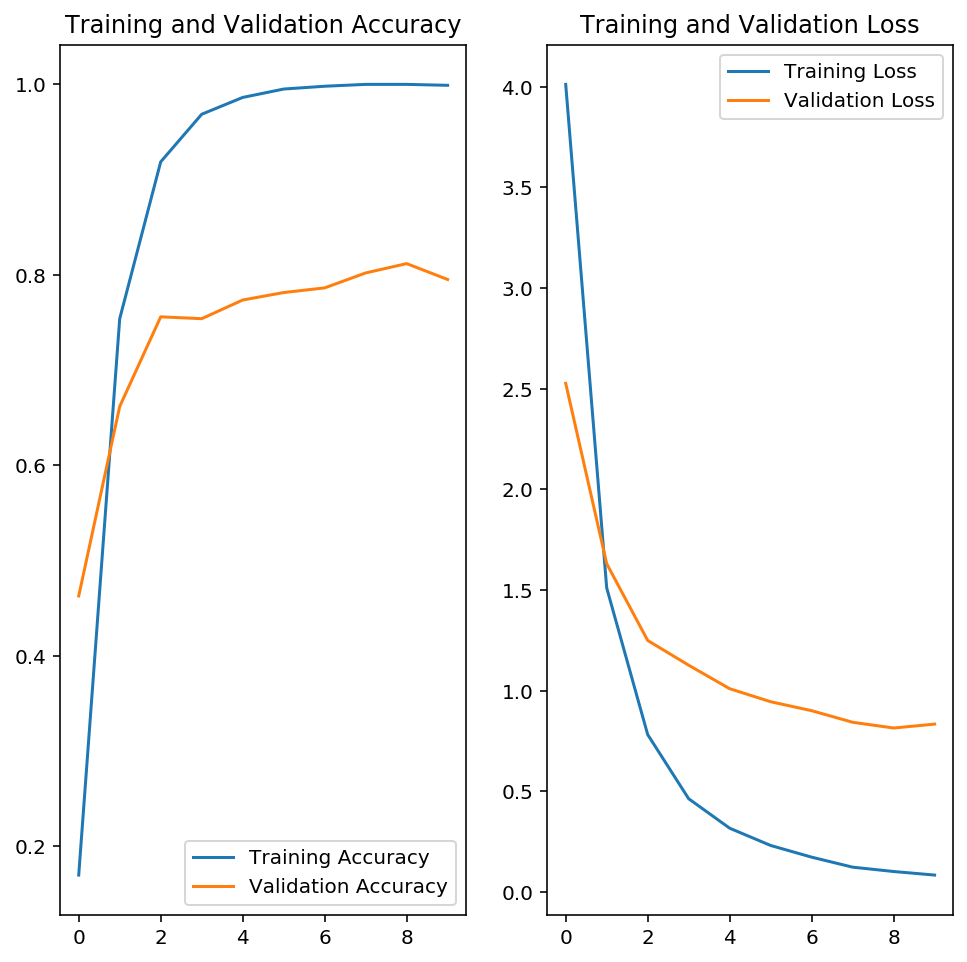

In [43]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


## Testing your Network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [44]:
# TODO: Print the loss and accuracy values achieved on the entire test set.

loss, accuracy = model.evaluate(testing_batches)

print('\nLoss on the TEST Set: {:,.3f}'.format(loss))
print('Accuracy on the TEST Set: {:.3%}'.format(accuracy))

385/385 [==============================] - 288s 747ms/step - loss: 0.9274 - accuracy: 0.7752

Loss on the TEST Set: 0.927
Accuracy on the TEST Set: 77.525%


## Testing with Validation Set

In [45]:
# EARLY Stoppoing
# Stop training when there is no improvement in the validation loss for 5 consecutive epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(training_batches,
                    epochs = 20,
                    validation_data=validation_batches,
                    callbacks=[early_stopping])

Epoch 1/20
64/64 [==============================] - 235s 4s/step - loss: 0.0730 - accuracy: 1.0000 - val_loss: 0.7958 - val_accuracy: 0.8147
Epoch 2/20
64/64 [==============================] - 127s 2s/step - loss: 0.0614 - accuracy: 1.0000 - val_loss: 0.8034 - val_accuracy: 0.8127
Epoch 3/20
64/64 [==============================] - 127s 2s/step - loss: 0.0529 - accuracy: 1.0000 - val_loss: 0.7447 - val_accuracy: 0.8225
Epoch 4/20
64/64 [==============================] - 126s 2s/step - loss: 0.0453 - accuracy: 1.0000 - val_loss: 0.7558 - val_accuracy: 0.8147
Epoch 5/20
64/64 [==============================] - 126s 2s/step - loss: 0.0395 - accuracy: 1.0000 - val_loss: 0.7717 - val_accuracy: 0.8078
Epoch 6/20
64/64 [==============================] - 126s 2s/step - loss: 0.0370 - accuracy: 1.0000 - val_loss: 0.7669 - val_accuracy: 0.8157
Epoch 7/20
64/64 [==============================] - 126s 2s/step - loss: 0.0317 - accuracy: 1.0000 - val_loss: 0.7388 - val_accuracy: 0.8137
Epoch 8/20
64

In [35]:
#EPOCHS = 20
#history = model.fit(training_batches,
 #                   epochs = EPOCHS,
  #                  validation_data=validation_batches)

In [46]:
# Check that history.history is a dictionary
print('history.history has type:', type(history.history))

# Print the keys of the history.history dictionary
print('\nThe keys of history.history are:', list(history.history.keys()))

history.history has type: <class 'dict'>

The keys of history.history are: ['loss', 'accuracy', 'val_loss', 'val_accuracy']


In [47]:
len(history.history['accuracy'])

14

Use the history.history dictionary to plot the flower model's loss and accuracy values obtained during training.

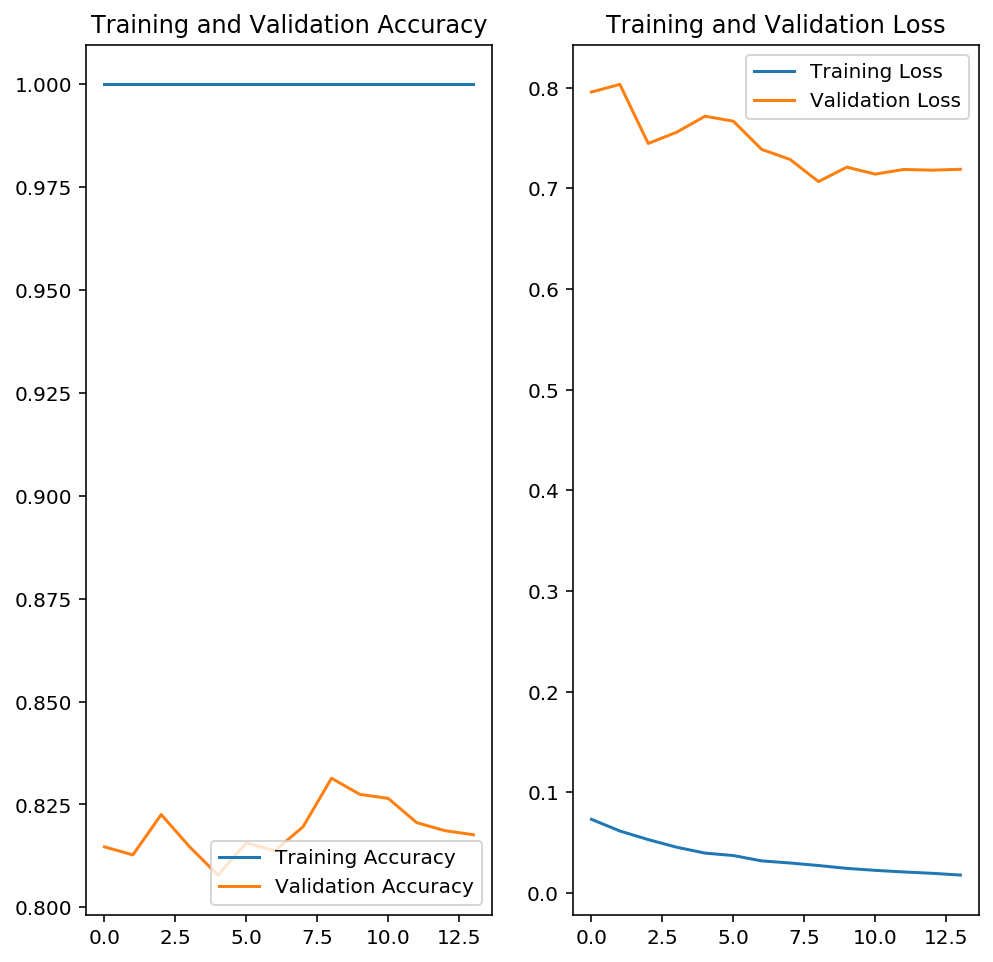

In [48]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(len(history.history['accuracy']))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Save the Model

Now that your network is trained, save the model so you can load it later for making inference. In the cell below save your model as a Keras model (*i.e.* save it as an HDF5 file).

### Save the tf Model

In [5]:
# path to saved model
saved_keras_model_filepath = './flowermodel_final_0621.tf'

In [52]:
# Save model in the .tf format (suggested by Udacity mentor: https://knowledge.udacity.com/questions/600473)
saved_keras_model_filepath = './flowermodel_final_0621.tf'
model.save(saved_keras_model_filepath)

### Load the tf Model
Recommended by a Udacity Mentor and still giving an error (refer to: https://knowledge.udacity.com/questions/600473).
I am not sure if the model can be loaded correcttly

In [6]:
reloaded_keras_model = tf.keras.models.load_model(saved_keras_model_filepath , custom_objects={'KerasLayer':hub.KerasLayer})

In [32]:
## TODO: Save your trained model as tf model.
#import time
#t = time.time()

# we provide the path to the directory not the name of the file.
#savedModel_directory = './{}'.format(int(t))
#tf.saved_model.save(model, savedModel_directory) # this function will create an assets folder, a var folder, and a saved_model.pb file

In [33]:
## load the saved model
#savedModel_directory = './{}'.format(int(t))
#reloaded_SavedModel = tf.saved_model.load(savedModel_directory) # this is not a keras object (.fit(), .precict(), and .summary() methods will not work)

## to make prediction on a batch of images with a re-loaded model, we use
#reloaded_SavedModel(image_batch, training=False)

### Save a keras Model

Despite the seen error, a model.h5 is created in the workspace!!!!!

In [49]:
# TODO: Save your trained model as a Keras model.
import time
t = time.time()

savedModel_directory = './{}'.format(int(t))
saved_keras_model_filepath = './flowermodel_final061421.h5'
#model.save(savedModel_directory,'./myflower_model.h5')
model.save(saved_keras_model_filepath)

ValueError: Unable to create dataset (name already exists)

### Load the Keras Model

Load the Keras model you saved above.

In [50]:
reloaded_model = tf.keras.models.load_model("flowermodel_final061421.h5", custom_objects={'KerasLayer': hub.KerasLayer})

ValueError: Cannot assign to variable Variable:0 due to variable shape (32,) and value shape (3, 3, 3, 32) are incompatible

In [1]:
#saved_keras_model_filepath = './flowermodel_final0621.h5'
#reloaded_keras_model = tf.keras.models.load_model('./flowermodel_final0621.h5', custom_objects={'KerasLayer':hub.KerasLayer})
#reloaded_keras_model = tf.keras.models.load_model(saved_keras_model_filepath, custom_objects={'KerasLayer':hub.KerasLayer})

#### This will return a tensor with the predicted label probabilities for each image in the batch. 

In [55]:
#for image_batch, label_batch in testing_batches.take(1):
 #  prediction_1 = model.predict(image_batch)
  # prediction_2 = reloaded_model(image_batch, training=False).numpy()
   #difference = np.abs(prediction_1 - prediction_2)
    #rint(difference.max())

NameError: name 'reloaded_SavedModel' is not defined

#### Get a keras model from the saved tf model

In [ ]:
#reloaded_keras_model_from_SavedModel = tf.keras.models.load_model(savedModel_directory)
#reloaded_keras_model_from_SavedModel.summary()

# Inference for Classification

Now you'll write a function that uses your trained network for inference. Write a function called `predict` that takes an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

The `predict` function will also need to handle pre-processing the input image such that it can be used by your model. We recommend you write a separate function called `process_image` that performs the pre-processing. You can then call the `process_image` function from the `predict` function. 

### Image Pre-processing

The `process_image` function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape `(224, 224, 3)`.

First, you should convert your image into a TensorFlow Tensor and then resize it to the appropriate size using `tf.image.resize`.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, you'll also need to normalize the pixel values. 

Finally, convert your image back to a NumPy array using the `.numpy()` method.

In [51]:
# TODO: Create the process_image function
image_size = 224
def process_image(image):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (image_size, image_size))
    image /= 255
    return image

To check your `process_image` function we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

The code below loads one of the above images using `PIL` and plots the original image alongside the image produced by your `process_image` function. If your `process_image` function works, the plotted image should be the correct size. 

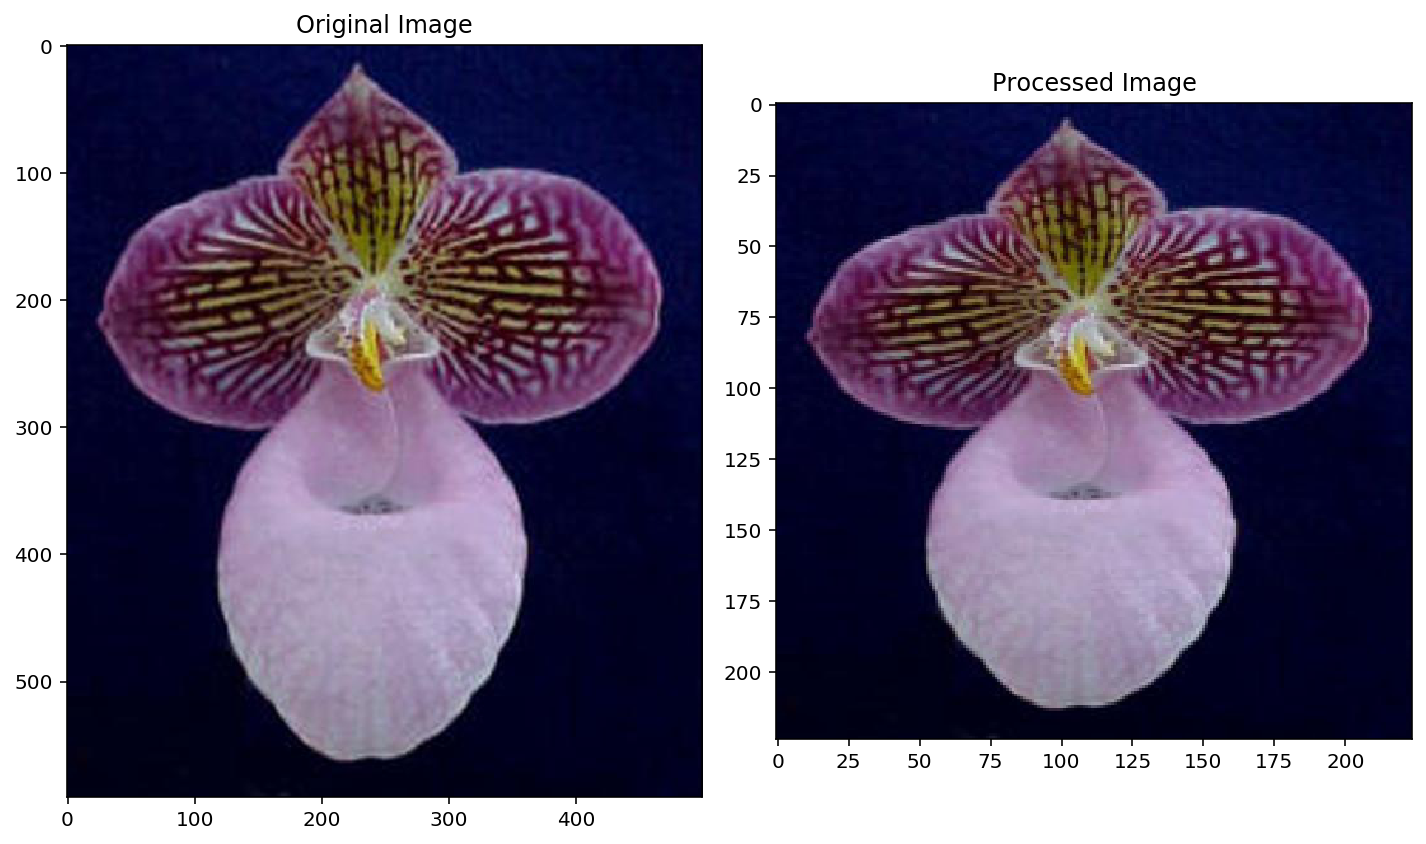

In [52]:
from PIL import Image

image_path = './test_images/hard-leaved_pocket_orchid.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)


fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

Once you can get images in the correct format, it's time to write the `predict` function for making inference with your model.

### Inference

Remember, the `predict` function should take an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

**Note:** The image returned by the `process_image` function is a NumPy array with shape `(224, 224, 3)` but the model expects the input images to be of shape `(1, 224, 224, 3)`. This extra dimension represents the batch size. We suggest you use the `np.expand_dims()` function to add the extra dimension. 

In [53]:
# TODO: Create the predict function --> Perform Inference
# hints obtained from the following Udacity ticket: https://knowledge.udacity.com/questions/124388

def predict(image_path, model, top_k=5): # make sure you indicate the right model
    # open a raw image from dataset
    im = Image.open(image_path)
    # format image as needed
    im = np.asarray(im)
    image = process_image(im)
    image = np.expand_dims(image, axis = 0) # to add an extra dimension as expected 
    # get model predictions
    ps = model.predict(image)
    # the top predictions here
    ps = ps[0].tolist()
    #get the top probs, their indices, and their values/class names (of top predictions)
    values, indices = tf.math.top_k(ps, k=top_k) 
    # get probs and map indices to class names
    probs=values.numpy().tolist()
    # map indices to class names
    classes = indices.numpy().tolist() 
    #classes = str(classes)
    prob_class = class_names.get(classes[0])
    
    return probs, classes, prob_class

In [70]:
probs, classes, prob_class= predict(image_path, model, top_k=5)
print(probs)      
print(classes)
print(prob_class)

flower = class_names.get(str(classes[0]))
print(flower)

[0.9394762516021729, 0.020221492275595665, 0.018619010224938393, 0.004029189236462116, 0.003698364831507206]
[60, 45, 23, 10, 38]
None
pink-yellow dahlia


In [96]:
from PIL import Image
from matplotlib import pyplot as plt

image_path = './test_images/cautleya_spicata.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)
#test_image.show()
test_image.shape;


w, h = test_image.shape[0], test_image.shape[1]
data = np.zeros((h, w, 3), dtype=np.uint8)
img = Image.fromarray(data, 'RGB')
#img.save('my.png')
img.show()

In [88]:
type(img);
#display(img);

In [97]:
predict_image = predict(image_path, model, top_k=5)
print('These are the top probabilities and classe indices and top class {} of the image'.format(predict_image))

These are the top probabilities and classe indices and top class ([0.9394762516021729, 0.020221492275595665, 0.018619010224938393, 0.004029189236462116, 0.003698364831507206], [60, 45, 23, 10, 38], None) of the image


In [63]:
type(test_image)

numpy.ndarray

# Sanity Check

It's always good to check the predictions made by your model to make sure they are correct. To check your predictions we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

In the cell below use `matplotlib` to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this:

<img src='assets/inference_example.png' width=600px>

You can convert from the class integer labels to actual flower names using `class_names`. 

95 bougainvillea


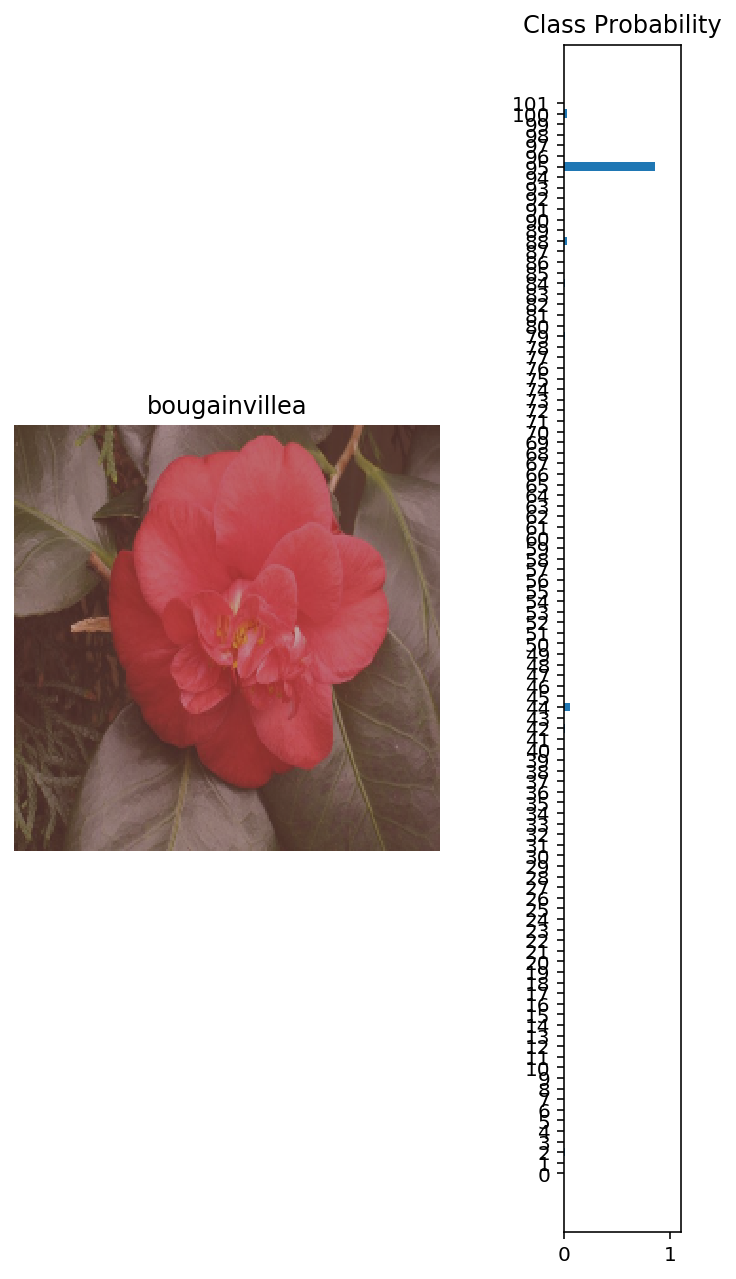

In [55]:
# TODO: Plot the input image along with the top 5 classes
for image_batch, label_batch in testing_batches.take(1):
    ps = model.predict(image_batch)
    images = image_batch.numpy().squeeze()[0]
    labels = label_batch.numpy()[0]
    class_name = str(labels)
    class_name = class_names.get(class_name)
    print(labels, class_name)

fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
ax1.imshow(images, cmap = plt.cm.binary)
ax1.axis('off')
ax1.set_title(class_name)
ax2.barh(np.arange(num_classes), ps[0])
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(num_classes))
ax2.set_yticklabels(np.arange(num_classes))
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)
plt.tight_layout()
    


#### post-training predictions
for image_batch, label_batch in training_batches.take(1):
    ps = model.predict(image_batch)
    first_image = image_batch.numpy().squeeze()[0]
  
  
fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
ax1.imshow(first_image, cmap = plt.cm.binary)
ax1.axis('off')
ax2.barh(np.arange(num_classes), ps[0])
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(num_classes))
ax2.set_yticklabels(np.arange(num_classes))
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)
plt.tight_layout()